In [1]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

import matplotlib.pyplot as plt

## References
## https://github.com/MedMNIST/MedMNIST/blob/main/medmnist/dataset.py
## Good examples for augmentations: https://www.neurotec.uni-bremen.de/drupal/node/30



In [2]:
mycwd = os.getcwd()
# print(mycwd)
os.chdir("../..")
path_datasets_filename = os.getcwd()+'/datasets/MedMNISTv2/pathmnist.npz'
#Task: Multi-Class (9) Number of Samples: 107,180 (89,996 / 10,004 / 7,180)
print(path_datasets_filename)

/home/mxochicale/repositories/mxochicale/diffusion-models-tutorials/datasets/MedMNISTv2/pathmnist.npz


In [3]:
npz_file = np.load(path_datasets_filename)

print(type(npz_file)) #lib.npyio.NpzFile
print(npz_file.keys())#KeysView(<numpy.lib.npyio.NpzFile object at 0x7f5ac597d9f0>)

train_imgs = npz_file['train_images']
train_labels = npz_file['train_labels']
#             self.imgs = npz_file['val_images']
#             self.labels = npz_file['val_labels']
#             self.imgs = npz_file['test_images']
#             self.labels = npz_file['test_labels']

print(train_imgs.shape)#(546, 28, 28)
print(train_labels.shape)#(546, 1)
print(train_imgs.dtype) #uint8
length_samples = train_imgs.shape[0]




<class 'numpy.lib.npyio.NpzFile'>
KeysView(<numpy.lib.npyio.NpzFile object at 0x7fb1f4452620>)
(89996, 28, 28, 3)
(89996, 1)
uint8


In [4]:

imagesTensor = torch.tensor(train_imgs)
print(imagesTensor.dtype) #uint8


IMAGE_SIZE = 28
CHANNELS = 3


print(type(imagesTensor))#<class 'torch.Tensor'>
print(imagesTensor.shape)#torch.Size([1080, 28, 28, 3])
imagesTensor = torch.permute(imagesTensor, (0, 3, 1, 2))
print(imagesTensor.shape)#torch.Size([1080, 28, 28, 3])

#####Transforms
#toTensor = torchvision.transforms.ToTensor()
#toPILImage = torchvision.transforms.ToPILImage()
# toResize = torchvision.transforms.Resize(image_size)
# toCenterCrop = torchvision.transforms.CenterCrop(image_size)
# toGraysacle = torchvision.transforms.Grayscale(num_output_channels=CHANNELS)



def scaleImage(x):
    #print(type(x)) #<class 'torch.Tensor'>
    #print(x.shape) #torch.Size([28, 28])

    if(x.min() < x.max()):  # Assuming the image isn't empty, rescale so its values run from 0 to 1
        x = (x - x.min())/(x.max() - x.min()) 
    z = x - x.mean()        # Subtract the mean value of the image
#     y = toTensor(y)
#     #y = toResize(y)
#     #y = toCenterCrop(y)
    
    return z

imageTensorX = torch.stack( [ scaleImage(x) for x in imagesTensor]  )
print(imageTensorX.shape)
print(type(imageTensorX))
print(imageTensorX.dtype)
# print(imageTensorX[0])#tensor([[[ 0.0597,  0.0440,  0.0597,  ...,  0.0597,  0.0440,  0.0753],


####imageTensorX = imagesTensor



torch.uint8
<class 'torch.Tensor'>
torch.Size([89996, 28, 28, 3])
torch.Size([89996, 3, 28, 28])
torch.Size([89996, 3, 28, 28])
<class 'torch.Tensor'>
torch.float32


In [5]:
## Filter out batches of classes 
## ADDED: Wed 28 Dec 18:37:09 GMT 2022; DONE: Thu 29 Dec 12:43:36 GMT 2022

#FROM: Fig 1. Example images for each of the nine tissue classes represented in the NCT-CRC-HE-100K data set.

#ADI, adipose tissue; 
#BACK, background; 
#DEB, debris; 

#LYM, lymphocytes; 
#MUC, mucus; 
#MUS, smooth muscle; 

#NORM, normal colon mucosa; 
#STR, cancer-associated stroma; 
#TUM, colorectal adenocarcinoma epithelium.

##=====================================
#CRC, colorectal cancer; 
#HE, hematoxylin–eosin; 
#NCT, National Center for Tumor Diseases; 

batch_class00 = []
batch_class01 = []
batch_class02 = []
batch_class03 = []
batch_class04 = []
batch_class05 = []
batch_class06 = []
batch_class07 = []
batch_class08 = []

for idx in  range(0, length_samples):
    if train_labels[idx]==0:
        batch_class00.append(imageTensorX[idx])
    elif train_labels[idx]==1:
        batch_class01.append(imageTensorX[idx])
    elif train_labels[idx]==2:
        batch_class02.append(imageTensorX[idx])
    elif train_labels[idx]==3:
        batch_class03.append(imageTensorX[idx])
    elif train_labels[idx]==4:
        batch_class04.append(imageTensorX[idx])
    elif train_labels[idx]==5:
        batch_class05.append(imageTensorX[idx])
    elif train_labels[idx]==6:
        batch_class06.append(imageTensorX[idx])        
    elif train_labels[idx]==7:
        batch_class07.append(imageTensorX[idx])                
    elif train_labels[idx]==8:
        batch_class08.append(imageTensorX[idx])                        
    else:
        print('no class')

batch_class00 = torch.stack(batch_class00, 0)
batch_class01 = torch.stack(batch_class01, 0)
batch_class02 = torch.stack(batch_class02, 0)
batch_class03 = torch.stack(batch_class03, 0)
batch_class04 = torch.stack(batch_class04, 0)
batch_class05 = torch.stack(batch_class05, 0)
batch_class06 = torch.stack(batch_class06, 0)
batch_class07 = torch.stack(batch_class07, 0)
batch_class08 = torch.stack(batch_class08, 0)

print(f' batch_class00.shape {batch_class00.shape}')
print(f' batch_class01.shape {batch_class01.shape}')
print(f' batch_class02.shape {batch_class02.shape}')
print(f' batch_class03.shape {batch_class03.shape}')
print(f' batch_class04.shape {batch_class04.shape}')
print(f' batch_class05.shape {batch_class05.shape}')
print(f' batch_class06.shape {batch_class06.shape}')
print(f' batch_class07.shape {batch_class07.shape}')
print(f' batch_class08.shape {batch_class08.shape}')
9366+9509+10360+10401+8006+12182+7886+9401+12885

 batch_class00.shape torch.Size([9366, 3, 28, 28])
 batch_class01.shape torch.Size([9509, 3, 28, 28])
 batch_class02.shape torch.Size([10360, 3, 28, 28])
 batch_class03.shape torch.Size([10401, 3, 28, 28])
 batch_class04.shape torch.Size([8006, 3, 28, 28])
 batch_class05.shape torch.Size([12182, 3, 28, 28])
 batch_class06.shape torch.Size([7886, 3, 28, 28])
 batch_class07.shape torch.Size([9401, 3, 28, 28])
 batch_class08.shape torch.Size([12885, 3, 28, 28])


89996

In [6]:
BATCH_SIZE=4
BATCHES_SIZE=length_samples/BATCH_SIZE
dataloader = DataLoader(batch_class06, batch_size=BATCH_SIZE, shuffle=True)
print(f'BATCHES_SIZE {BATCHES_SIZE} or len(dataloader) {len(dataloader)}')


BATCHES_SIZE 22499.0 or len(dataloader) 1972


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 0; sampled images in the batch: 0 of 89996
    img.shape: torch.Size([4, 3, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 122])


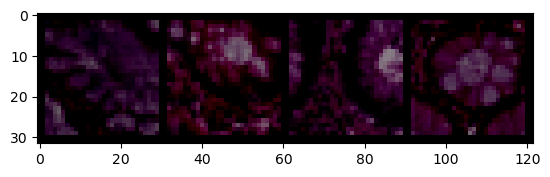

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch_idx: 1000; sampled images in the batch: 4000 of 89996
    img.shape: torch.Size([4, 3, 28, 28])
    img.dtype: torch.float32
    grid_img.shape: torch.Size([3, 32, 122])


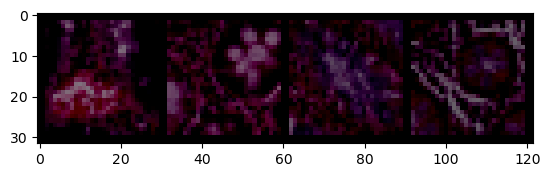

In [7]:
## Displaying dataloader content
len_dataloader = len(dataloader)

for batch_idx, batch in enumerate(dataloader):  #iterate through each batch    
    if batch_idx % 1000 == 0:
        print(f'batch_idx: {batch_idx}; sampled images in the batch: { batch_idx*BATCH_SIZE } of {length_samples}')
        #print(batch.shape)
        img = batch
        print(f'    img.shape: {img.shape}') #torch.Size([BATCH_SIZE, 1, 64, 64])
        print(f'    img.dtype: {img.dtype}') #torch.Size([BATCH_SIZE, 1, 64, 64])

        grid_img = torchvision.utils.make_grid(img) #also (img, nrow=10)
        print(f'    grid_img.shape: {grid_img.shape}')#torch.Size([3, 482, 242])
        plt.imshow(grid_img.permute(1, 2, 0))
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy() ) 
        #plt.imshow(grid_img.permute(1, 2, 0).numpy().astype("float32")) 
        #plt.imshow(grid_img.permute(1, 2, 0).numpy().astype("uint8")) 
        #plt.imshow(grid_img.permute(1, 2, 0), vmin=0, vmax=1)
        #plt.imshow(grid_img.permute(1, 2, 0), clim=(0,1))
        #plt.imshow(grid_img.permute(1, 2, 0), cmap='gray', vmin=0, vmax=1)
        #plt.imshow(grid_img.permute(1, 2, 0), cmap='gray',  clim=(0,1))
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy().astype("float32"), clim=(0,1)) 
        #plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy().astype("float32")) 
        #plt.imshow(img, cmap='gray', vmin=0, vmax=1)

        
        
        plt.show()
    
    

In [8]:
# ls -la

In [9]:
os.chdir(mycwd)    # go back where you came from